# <center> Linear Regression with Cross Validation

# <center> K-Fold Cross-Validation in Python Using SKLearn

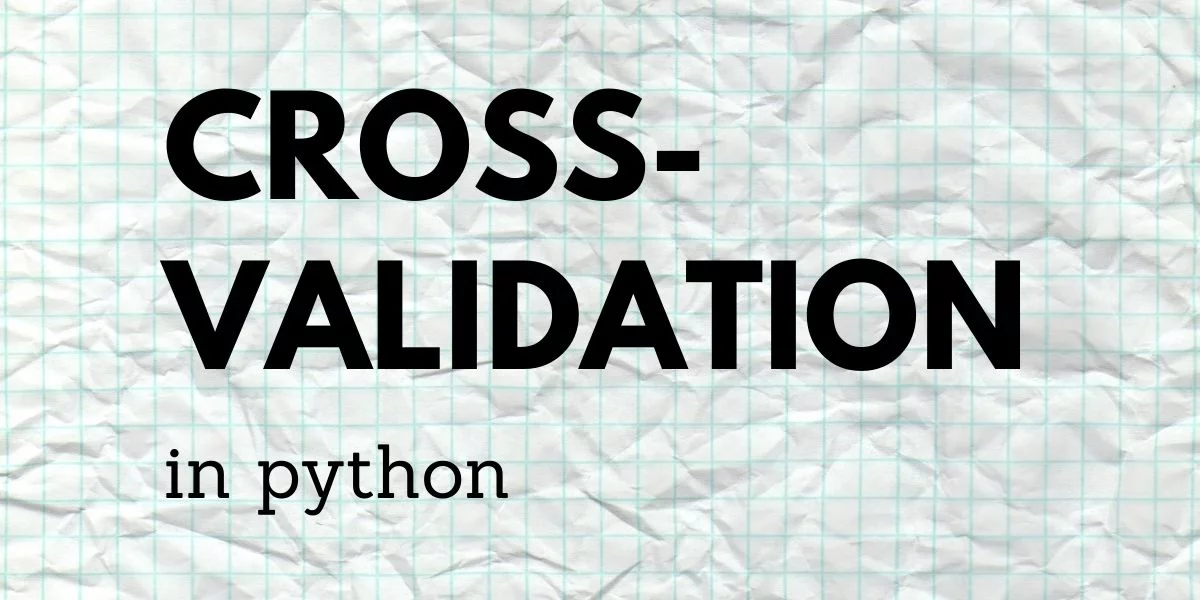

In [1]:
from IPython.core.display import Image
Image('C:/Users/moham/Desktop/Python/PythonTests/Cross-Validation.jpg')

Splitting a dataset into training and testing set is an essential and basic task when comes to getting a machine learning model ready for training. To determine if our model is overfitting or not we need to test it on unseen data (Validation set).

If a given model does not perform well on the validation set then it’s gonna perform worse when dealing with real live data. This notion makes Cross-Validation probably one of the most important concepts of machine learning which ensures the stability of our model.

Cross-Validation is just a method that simply reserves a part of data from the dataset and uses it for testing the model(Validation set), and the remaining data other than the reserved one is used to train the model.

## Cross-Validation Intuition

__Let’s first see why we should use cross validation.__
* It helps us with model evaluation finally determining the quality of the model.
* Crucial to determining if the model is generalizing well to data.
* To check if the model is overfitting or underfitting.
* Finally, it lets us choose the model which had the best performance.

__There are many types of Cross Validation Techniques:__

* Leave one out cross validation
* k-fold cross validation
* Stratified k-fold cross validation
* Time Series cross validation


## Implementing the K-Fold Cross-Validation
The dataset is split into ‘k’ number of subsets, k-1 subsets then are used to train the model and the last subset is kept as a validation set to test the model. Then the score of the model on each fold is averaged to evaluate the performance of the model.


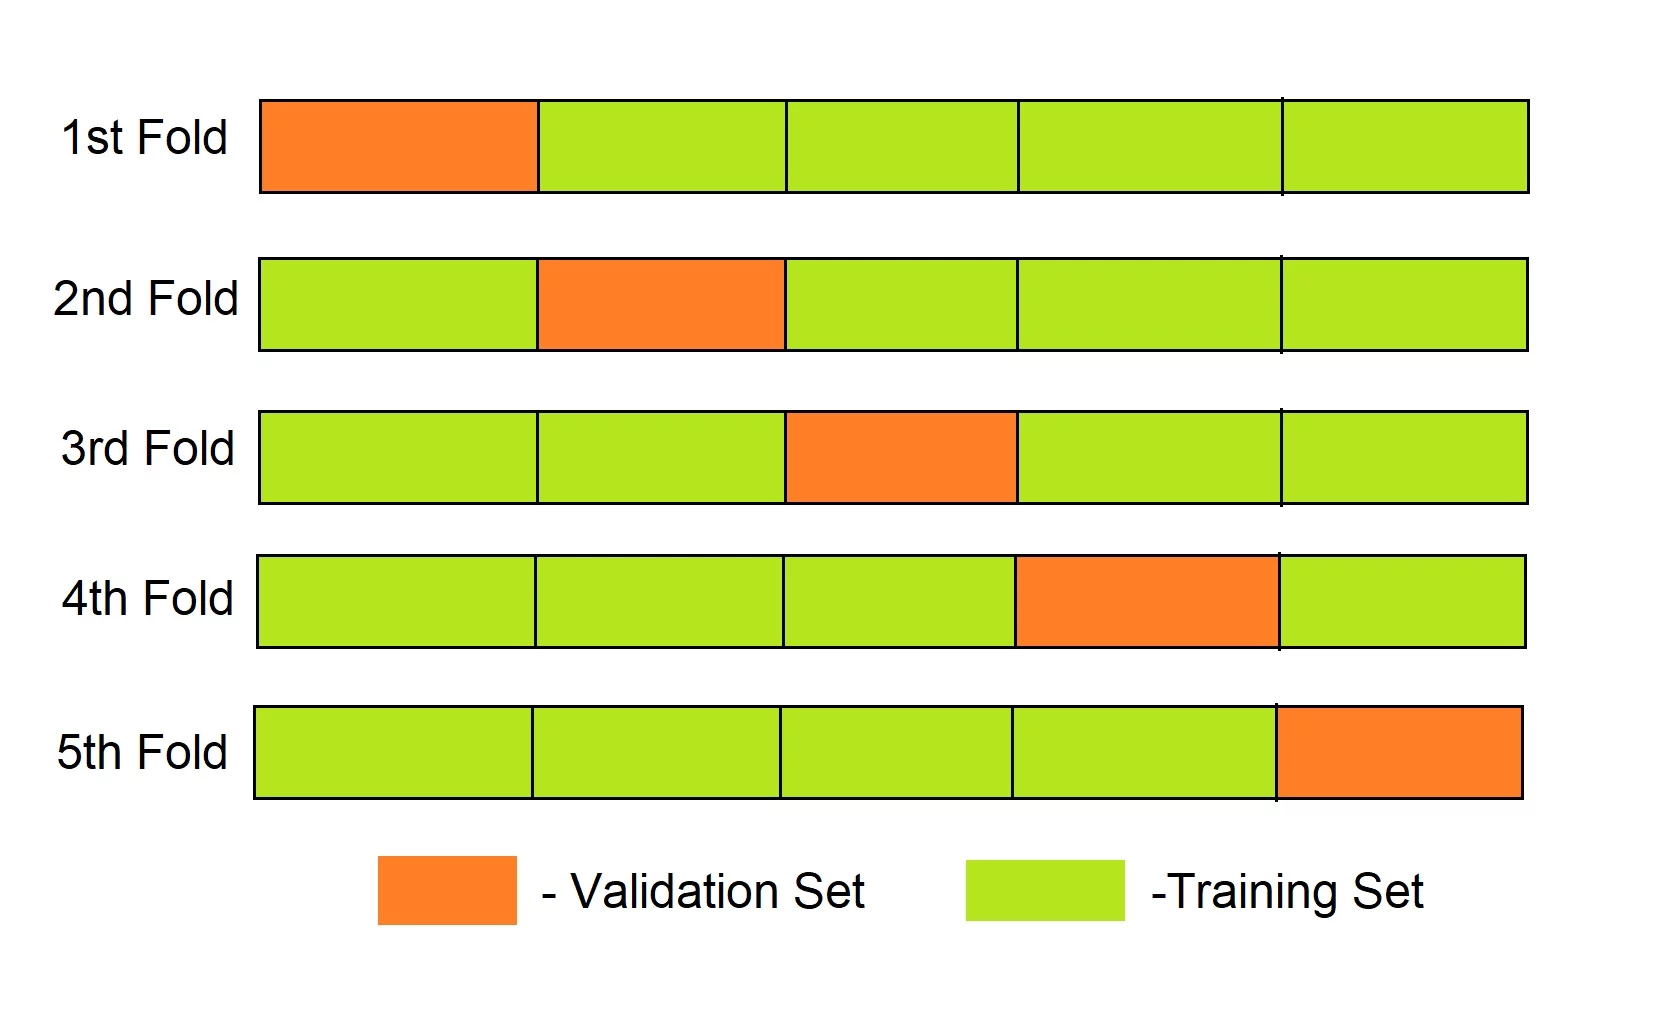

In [2]:
Image('C:/Users/moham/Desktop/Python/PythonTests/5_Fold_Cross_Validation.jpg')

In [3]:
# import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data 

In [4]:
data= pd.read_csv('C:/Users/moham/Desktop/Python/PythonTests/petrol_consumption.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## K-fold Cross Validation using scikit learn

In [7]:
X= data.iloc[:, np.r_[0:4]]
y= data.iloc[:, 4]

In [8]:
# Import KFold from sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
lm= LinearRegression()

In [10]:
# Create KFold generator
kf = KFold(n_splits=5, shuffle=True, random_state=1711)

# Create splits
splits = kf.split(X)

In [11]:
# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: {}".format(len(train_index)))
    print("Number of validation indices: {}".format(len(val_index)))
    print()

Number of training indices: 38
Number of validation indices: 10

Number of training indices: 38
Number of validation indices: 10

Number of training indices: 38
Number of validation indices: 10

Number of training indices: 39
Number of validation indices: 9

Number of training indices: 39
Number of validation indices: 9



In [12]:
# Access the training and validation indices of splits by using a for loop
for train_index , val_index in splits:
    X_train , X_val = X[train_index], X[val_index]
    y_train , y_val = y[train_index] , y[val_index]
    lm.fit(X_train, y_train)
    preds = lm.predict(X_val)
    print("The MSE metric: {:.5f}".format(mean_squared_error(y_val, preds)))
    print("The MAE metric: {:.5f}".format(mean_absolute_error(y_val, preds)))
    print()

In [13]:
# Access the training and validation indices of splits by using a for loop
for train_index, val_index in splits:
   
    # Split the data into a train and a validation set
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    
    # Fit a linear regression
    lm.fit(X_train, y_train)
    
    # Make predictions, and print mean squared error and mae
    preds = lm.predict(X_val)
    print("The MSE metric: {:.5f}".format(mean_squared_error(y_val, preds)))
    print("The MAE metric: {:.5f}".format(mean_absolute_error(y_val, preds)))
    print()

# Automating K-fold Cross Validation with cross_val_score() Function

In [14]:
from sklearn.model_selection import cross_val_score 

In [15]:
# Instantiate a LR object
lreg = LinearRegression()
# perform cross validation
cv_results = cross_val_score(lreg, X, y, cv = 5)
# print the type of CV results
print(type(cv_results))
cv_results

<class 'numpy.ndarray'>


array([-0.22573437,  0.62535306, -0.08289785, -0.16796305,  0.30273973])

In [16]:
# compute the average R^2
avg_r_sq = np.mean(cv_results)
print(f"The average R^2 is: {avg_r_sq :.4f}")

The average R^2 is: 0.0903


# Scoring The Cross Validation Results with Different Metrics

In [17]:
# Import the necessary tools for performing Cross Validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

In [18]:
# Create linear regression object
lreg_cv = LinearRegression()
# make mae scorer
mae = make_scorer(mean_absolute_error)
# perform 5-fold CV
cv_res = cross_val_score(lreg_cv,
                         X, y,
                        cv = 5,
                        scoring=mae)

In [19]:
# Look at the results
print(cv_res)

[51.00294324 57.57120066 51.95759179 53.68447862 80.36175829]


In [20]:
# Print the mean error
print(cv_res.mean())

58.91559451839531


In [21]:
#make mse scorer
mse= make_scorer(mean_squared_error)
cv_mse= cross_val_score(lreg_cv, X, y, cv= 5,scoring= mse)

In [22]:
print(cv_mse)

[ 4879.40339844  4390.71601106  3639.35979059  4332.2200856
 12820.82586046]


In [23]:
print(np.sqrt(cv_mse))

[ 69.85272649  66.26247815  60.3271066   65.81960259 113.22908575]


In [24]:
print(np.mean(np.sqrt(cv_mse)))

75.09819991833851


# <center> Logistic Regression

In [25]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

In [26]:
#Loading the dataset
data1 = load_breast_cancer(as_frame = True)
df = data1.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [28]:
# LogisticRegression
model = LogisticRegression(solver= 'liblinear')
#Implementing cross validation
k = 5

kf = KFold(n_splits=k, random_state=None)
acc_score = [] 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    print("accuracy of each fold: {:.5f}".format(accuracy_score(y_test, pred_values))) 
    print() 
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
print('Avg accuracy : {}'.format(np.mean(acc_score)))

accuracy of each fold: 0.91228

accuracy of each fold: 0.94737

accuracy of each fold: 0.97368

accuracy of each fold: 0.97368

accuracy of each fold: 0.95575

Avg accuracy : 0.952553951249806


In [ ]:
!jupyter 